In [36]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as ny
from bindec import dec_to_bin, bin_to_dec
from PIL import Image
import imageio
import os
from PIL import Image
from numpy import *

In [37]:
url=r"C:\Users\spectrumxking\Desktop\Project Final Sem\polly\elaine.tiff"
pic = cv.imread(url, cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original')

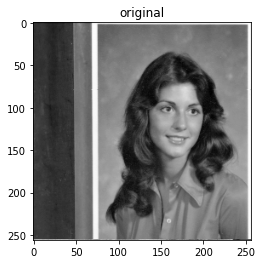

In [38]:
plt.imshow(pic,cmap="gray")
plt.title("original")


In [39]:
#readinf the image height and width
print(pic.shape)

(256, 256)


In [40]:
# converting original image into its 8bit binary form using binary_reper() 
lst=[]
for i in range (pic.shape[0]):
    for j in range (pic.shape[1]):
        lst.append(ny.binary_repr(pic[i][j], width=8))

In [41]:
# making the 8 bitplanes
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])

In [42]:
titles = ['original', 'bitplane8', 'bitplane7', 'bitplane6', 'bitplane5', 'bitplane4', 'bitplane3', 'bitplane2', 'bitplane1']
images = [pic, bitplane8, bitplane7, bitplane6, bitplane5, bitplane4, bitplane3, bitplane2, bitplane1]

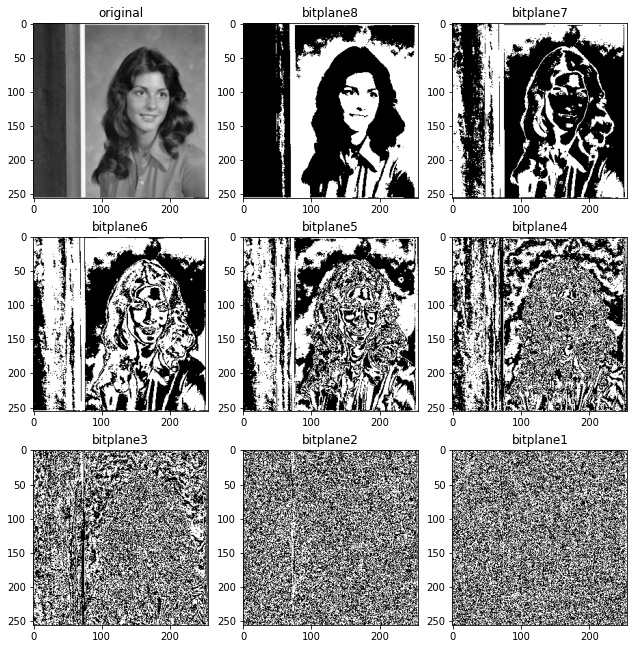

In [43]:
#showing the bitplanes into 3planes in a row.....
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [44]:
#each bitplanes in its binary form (saving by using index list)
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane8.shape
print(lst[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane7.shape
print (lst[2])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
print (lst[3])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
print (lst[4])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
print (lst[5])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
print (lst[6])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
print (lst[7])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])
print (lst[8])

00111000
00110111
00110111
00110110
00110110
00110011
00110100
00110111


In [45]:
print (pic)

[[ 41  56  55 ... 249 247 232]
 [ 42  56  57 ... 249 247 235]
 [ 47  63  61 ... 249 247 233]
 ...
 [ 74  73  71 ... 246 247 243]
 [ 75  71  72 ... 247 247 244]
 [162 165 170 ...  84  83  77]]


In [50]:
#lets define the entropy of this images
def entropy(im):
    p =ny.array([(im--v).sum() for v in range (256)])
    p= p/p.sum()
#compute e= -sum(p(si)*log2(p(si))
    e=-(p*ny.log2(p)).sum()
    return e

In [51]:
pic1 =entropy(pic)
print(pic1)

7.928672412858776


In [52]:
def entropy(pic):
    p =ny.array([(pic--v).sum() for v in range (256)])
    p= p/p.sum()
#compute e= -sum(p(si)*log2(p(si))
    e=-(p*ny.log2(p)).sum()
    return e

In [54]:
pic3= entropy(pic)
print(pic3)

7.928672412858776


In [73]:
import numpy as np
dd = (256, 256)
ny.ones(dd) 

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

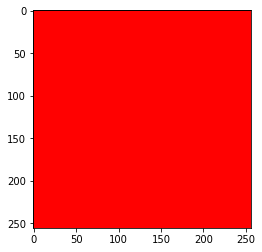

In [94]:
from PIL import Image
import numpy as ny

w, h = 256, 256
data = ny.ones((h, w, 3), dtype=np.uint8)
data[1:256, 1:256] = [255, 1, 1] # red patch in upper left
img = Image.fromarray(data, 'RGB')
plt.imshow(img, cmap='gray')

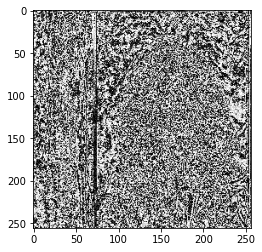

In [109]:
u=(bitplane1+bitplane3)
plt.imshow(u, cmap="gray")

In [110]:
u1= entropy(u)
print(u1)

7.732200908058898
